In [47]:
import pyswarms as ps
import openpyxl
import numpy as np

In [48]:
workbook = openpyxl.load_workbook('DataRegression.xlsx')
sheets_to_extract = ['Var01', 'Var09', 'Var18']

data = {}


for sheet_name in sheets_to_extract:
    sheet = workbook[sheet_name]
    sheet_data = []
    for row in sheet.iter_rows(values_only=True):
        sheet_data.append(row)
    data[sheet_name] = sheet_data

workbook.close()

In [49]:
var01_data = data['Var01']
var09_data = data['Var09']
var18_data = data['Var18']

var01_x_values = [row[1] for row in var01_data if row[0] is not None][1:]  
var01_y_values = [row[0] for row in var01_data if row[0] is not None][1:]   

var09_x_values = [row[1] for row in var09_data if row[0] is not None][1:] 
var09_y_values = [row[0] for row in var09_data if row[0] is not None][1:] 

var18_x_values = [row[1] for row in var18_data if row[0] is not None][1:] 
var18_y_values = [row[0] for row in var18_data if row[0] is not None][1:] 

print("Var09 x values:", var09_x_values)
print("Var09 y values:", var09_y_values)


Var09 x values: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]
Var09 y values: [0.844, 0.908, 0.932, 0.936, 0.925, 0.908, 0.881, 0.85, 0.818, 0.784, 0.751, 0.718, 0.685, 0.658, 0.628, 0.603, 0.58, 0.558, 0.538, 0.522, 0.506, 0.49, 0.478, 0.467, 0.457, 0.448, 0.438, 0.431, 0.424, 0.42, 0.414, 0.411, 0.406]


2024-05-30 13:38:20,620 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 3.0018800703487796, 'c2': 7.161298081819855, 'w': 3.690042755323803, 'k': 4, 'p': 1}
pyswarms.single.global_best:   0%|          |0/10

pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.25
2024-05-30 13:38:20,659 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2463467684727696, best pos: [0.62947952 0.28434747 0.39140972 0.11263633 0.3428944 ]
2024-05-30 13:38:20,672 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 3.7244613990529905, 'c2': 7.045841164747806, 'w': 3.2094174562751485, 'k': 7, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.14
2024-05-30 13:38:20,691 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.140390511882405, best pos: [0.62772885 0.27081737 0.22129416 0.17692806 0.22004074]
2024-05-30 13:38:20,697 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 1.1610746374956613, 'c2': 6.2617791898355275, 'w': 3.95584273292857, 'k': 8, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.801
2024-05-30 13:38:20,709 - pyswarms.single.global_best - INFO - O

Best score: 0.2648050999160968
Best options: {'c1': 3.090776268100146, 'c2': 8.18211418507773, 'w': 2.8126958881453787, 'k': 0, 'p': 1}


pyswarms.single.global_best:   0%|          |0/100/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_97724/1421029301.py:15: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2, axis=1)  # Sum over all data points for each set of parameters
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=7.37
2024-05-30 13:38:23,433 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.365313065938765, best pos: [ 0.99857688  2.00900604 -0.83197821  1.97564875  2.        ]


Best cost: 7.365313065938765
Best position: [ 0.99857688  2.00900604 -0.83197821  1.97564875  2.        ]


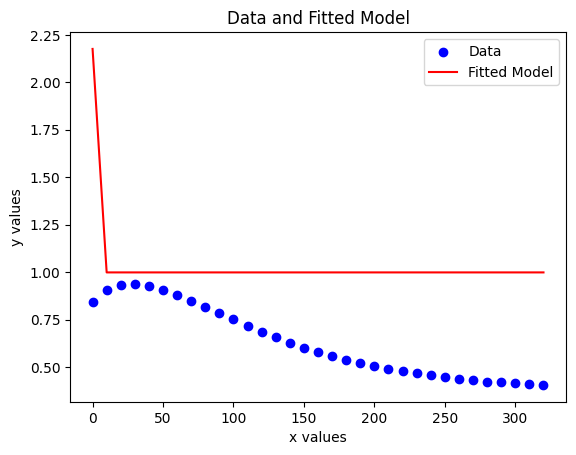

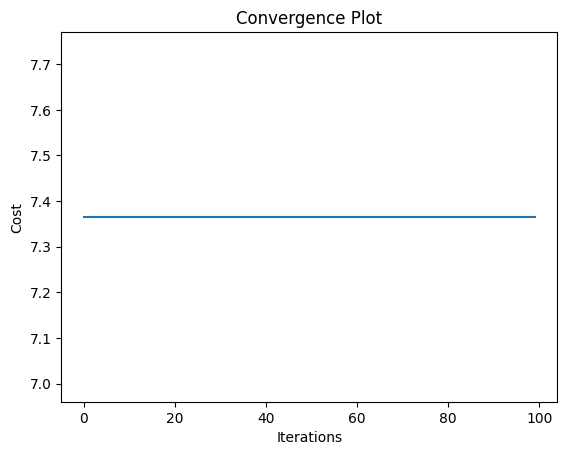

In [50]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.search import RandomSearch
import matplotlib.pyplot as plt

# Ensure var09_x_values and var09_y_values are numpy arrays
var09_x_values = np.asarray(var09_x_values)
var09_y_values = np.asarray(var09_y_values)

# Define the objective function
def objective_function(params):
    b1, b2, b3, b4, b5 = params.T  # Transpose to unpack each column into separate variables
    model = b1[:, None] + b2[:, None] * np.exp(-var09_x_values * b4[:, None]) + b3[:, None] * np.exp(-var09_x_values * b5[:, None])
    residuals = var09_y_values - model
    return np.sum(residuals**2, axis=1)  # Sum over all data points for each set of parameters

# Set-up choices for the parameters for RandomSearch
options = {
    'c1': (1, 5),
    'c2': (6, 10),
    'w': (2, 5),
    'k': (0, 15),
    'p': 1
}

# Create a RandomSearch object
g = RandomSearch(ps.single.GlobalBestPSO, n_particles=50,
                 dimensions=5, options=options, objective_func=objective_function,
                 iters=10, n_selection_iters=100)

# Perform the search to find the best hyperparameters
best_score, best_options = g.search()

# Print the best hyperparameters found
print(f"Best score: {best_score}")
print(f"Best options: {best_options}")

# Create the optimizer with the best options found by RandomSearch
best_hyperparams = {'c1': best_options['c1'], 'c2': best_options['c2'], 'w': best_options['w'], 'k': best_options['k'], 'p': best_options['p']}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=5, options=best_hyperparams, bounds=(np.array([0, 0, -2, -2, 2]), np.array([10, 5, 2, 2, 2])))

# Perform optimization with the best hyperparameters
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)
print(f"Best cost: {best_cost}")
print(f"Best position: {best_pos}")

# Plot the original data points
plt.scatter(var09_x_values, var09_y_values, label='Data', color='blue')

# Plot the fitted model using the best parameters
b1, b2, b3, b4, b5 = best_pos
fitted_model = b1 + b2 * np.exp(-var09_x_values * b4) + b3 * np.exp(-var09_x_values * b5)
plt.plot(var09_x_values, fitted_model, label='Fitted Model', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Data and Fitted Model')
plt.show()

# Plot the convergence
plt.plot(optimizer.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot')
plt.show()


2024-05-30 13:41:22,883 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 3.2550477450478215, 'c2': 8.160434063278833, 'w': 3.911212263813111, 'k': 10, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.1
2024-05-30 13:41:22,896 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1003688298774703, best pos: [0.49266803 0.43299276 0.27012673 0.03487315 0.1380049 ]
2024-05-30 13:41:22,899 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 3.9428498163444945, 'c2': 7.40752572031303, 'w': 2.5934759226694064, 'k': 12, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.17
2024-05-30 13:41:22,910 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.168362877933605, best pos: [0.67168744 0.00532733 0.3108094  0.91835307 0.16845631]
2024-05-30 13:41:22,916 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 2.1338507321116302, 'c2': 7.7809748

Best score: 0.22464976526864178
Best options: {'c1': 3.586154118471751, 'c2': 9.168016962751004, 'w': 3.2653783081802574, 'k': 14, 'p': 1}


pyswarms.single.global_best:   0%|          |0/100/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_97724/1746012266.py:16: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2, axis=1)  # Sum over all data points for each set of parameters
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.34
2024-05-30 13:41:25,639 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.339549866370007, best pos: [7.38243400e-01 2.05895632e+00 5.54926657e-04 8.43468963e-01
 2.00000000e+00]


Best cost: 5.339549866370007
Best position: [7.38243400e-01 2.05895632e+00 5.54926657e-04 8.43468963e-01
 2.00000000e+00]


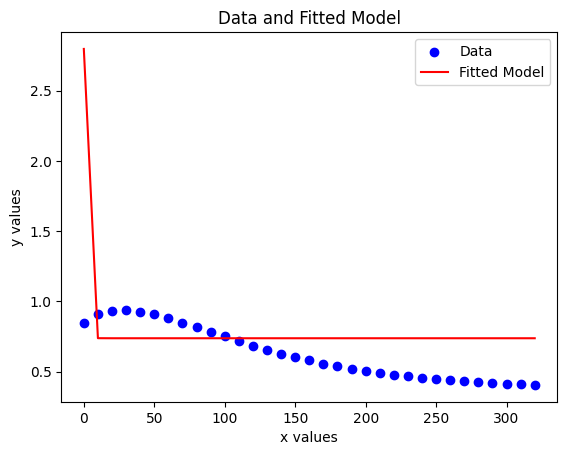

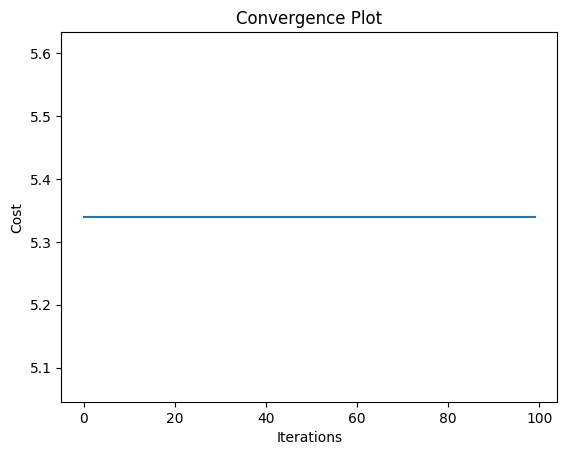

In [55]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt
from pyswarms.utils.search.random_search import RandomSearch


# Sample data for var09_x_values and var09_y_values
var09_x_values = np.asarray(var09_x_values)
var09_y_values = np.asarray(var09_y_values)

# Define the objective function
def objective_function(params):
    b1, b2, b3, b4, b5 = params.T  # Transpose to unpack each column into separate variables
    model = b1[:, None] + b2[:, None] * np.exp(-var09_x_values * b4[:, None]) + b3[:, None] * np.exp(-var09_x_values * b5[:, None])
    residuals = var09_y_values - model
    return np.sum(residuals**2, axis=1)  # Sum over all data points for each set of parameters

# Set-up choices for the parameters for RandomSearch
options = {
    'c1': (1, 5),
    'c2': (6, 10),
    'w': (2, 5),
    'k': (0, 15),
    'p': 1
}

# Create a RandomSearch object
g = RandomSearch(ps.single.GlobalBestPSO, n_particles=50,
                           dimensions=5, options=options, objective_func=objective_function,
                           iters=10, n_selection_iters=100)

# Perform the search to find the best hyperparameters
best_score, best_options = g.search()

# Print the best hyperparameters found
print(f"Best score: {best_score}")
print(f"Best options: {best_options}")

# Create the optimizer with the best options found by RandomSearch
best_hyperparams = {'c1': best_options['c1'], 'c2': best_options['c2'], 'w': best_options['w'], 'k': best_options['k'], 'p': best_options['p']}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=5, options=best_hyperparams, bounds=(np.array([0, 0, -2, -2, 2]), np.array([10, 5, 2, 2, 2])))

# Perform optimization with the best hyperparameters
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)
print(f"Best cost: {best_cost}")
print(f"Best position: {best_pos}")

# Plot the original data points
plt.scatter(var09_x_values, var09_y_values, label='Data', color='blue')

# Plot the fitted model using the best parameters
b1, b2, b3, b4, b5 = best_pos
fitted_model = b1 + b2 * np.exp(-var09_x_values * b4) + b3 * np.exp(-var09_x_values * b5)
plt.plot(var09_x_values, fitted_model, label='Fitted Model', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Data and Fitted Model')
plt.show()

# Plot the convergence
plt.plot(optimizer.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot')
plt.show()


In [64]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt
from pyswarms.utils.search.random_search import RandomSearch


# Sample data for var09_x_values and var09_y_values
var18_x_values = np.asarray(var18_x_values)
var18_y_values = np.asarray(var18_y_values)

def objective_function(params):
    b1, b2, b3 = params[0], params[1], params[2]  # Unpack parameters from params array
    return np.sum([(var18_y_values[i] - b1 * np.power(b2 + var18_x_values[i], -1/b3))**2 for i in range(len(var18_x_values))])


# Set-up choices for the parameters for RandomSearch
options = {
    'c1': (1, 5),
    'c2': (6, 10),
    'w': (2, 5),
    'k': (0, 15),
    'p': 1
}

# Create a RandomSearch object
g = RandomSearch(ps.single.GlobalBestPSO, n_particles=50,
                           dimensions=3, options=options, objective_func=objective_function,
                           iters=10, n_selection_iters=100)

# Perform the search to find the best hyperparameters
best_score, best_options = g.search()

# Print the best hyperparameters found
print(f"Best score: {best_score}")
print(f"Best options: {best_options}")

bounds = np.array([[-10000, -1000], [1, 100], [0, 1]])

# Create the optimizer with the best options found by RandomSearch
best_hyperparams = {'c1': best_options['c1'], 'c2': best_options['c2'], 'w': best_options['w'], 'k': best_options['k'], 'p': best_options['p']}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=best_hyperparams, bounds=(np.array([-10000, 1, 0]), np.array([-1000, 100, 1])))

# Perform optimization with the best hyperparameters
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)
print(f"Best cost: {best_cost}")
print(f"Best position: {best_pos}")

'''# Plot the original data points
plt.scatter(var09_x_values, var09_y_values, label='Data', color='blue')

# Plot the fitted model using the best parameters
b1, b2, b3, b4, b5 = best_pos
fitted_model = b1 + b2 * np.exp(-var09_x_values * b4) + b3 * np.exp(-var09_x_values * b5)
plt.plot(var09_x_values, fitted_model, label='Fitted Model', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Data and Fitted Model')
plt.show()

# Plot the convergence
plt.plot(optimizer.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot')
plt.show()'''


2024-05-30 13:50:04,483 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 2.514047411938619, 'c2': 6.0502514500496005, 'w': 4.464450515444677, 'k': 7, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=4.85e+5
2024-05-30 13:50:04,507 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 484527.7594622398, best pos: [0.51638117 0.25357701 0.30706395]
2024-05-30 13:50:04,510 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 1.9795202949229322, 'c2': 8.64503257460926, 'w': 4.232217897956713, 'k': 10, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=4.85e+5
2024-05-30 13:50:04,525 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 484957.0515208058, best pos: [0.21436451 0.85255188 0.86497674]
2024-05-30 13:50:04,539 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 2.1866696619741335, 'c2': 7.821769543697233, 'w': 3.1626911426394377, 'k': 

Best score: 484105.14697198174
Best options: {'c1': 4.852572933103608, 'c2': 6.741532816583684, 'w': 3.32307572288202, 'k': 7, 'p': 1}


pyswarms.single.global_best:   0%|          |0/100/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_97724/3619497689.py:13: RuntimeWarning: invalid value encountered in power
  return np.sum([(var18_y_values[i] - b1 * np.power(b2 + var18_x_values[i], -1/b3))**2 for i in range(len(var18_x_values))])
pyswarms.single.global_best:   0%|          |0/100, best_cost=inf


ValueError: operands could not be broadcast together with shapes (0,) (50,3) 

In [65]:
# Sample data for var18_x_values and var18_y_values
var18_x_values = np.asarray(var18_x_values)
var18_y_values = np.asarray(var18_y_values)

# Define the objective function
def objective_function(params):
    b1, b2, b3 = params
    return np.sum([(var18_y_values[i] - b1 * np.power(b2 + var18_x_values[i], -1/b3))**2 for i in range(len(var18_x_values))])

# Set-up choices for the parameters for RandomSearch
options = {
    'c1': (1, 5),
    'c2': (6, 10),
    'w': (2, 5),
    'k': (0, 15),
    'p': 1
}

# Create a RandomSearch object
g = RandomSearch(ps.single.GlobalBestPSO, n_particles=50,
                           dimensions=3, options=options, objective_func=objective_function,
                           iters=10, n_selection_iters=100)

# Perform the search to find the best hyperparameters
best_score, best_options = g.search()

# Print the best hyperparameters found
print(f"Best score: {best_score}")
print(f"Best options: {best_options}")

# Define the bounds for each parameter
bounds = ([-10000, 1, 0], [-1000, 100, 1])

# Create the optimizer with the best options found by RandomSearch
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=best_options, bounds=bounds)

# Perform optimization with the best hyperparameters
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)
print(f"Best cost: {best_cost}")
print(f"Best position: {best_pos}")

# Plot the convergence
plt.plot(optimizer.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot')
plt.show()


2024-05-30 13:51:47,164 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 4.368413294454937, 'c2': 6.210456098692745, 'w': 3.5621649965125006, 'k': 12, 'p': 1}
pyswarms.single.global_best:   0%|          |0/10


ValueError: too many values to unpack (expected 3)

/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_97724/3164287902.py:14: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2)  # Sum over all data points


Optimized parameters:
[ 0.37496672  1.87300412 -1.40133556  0.01274013  0.02239349]


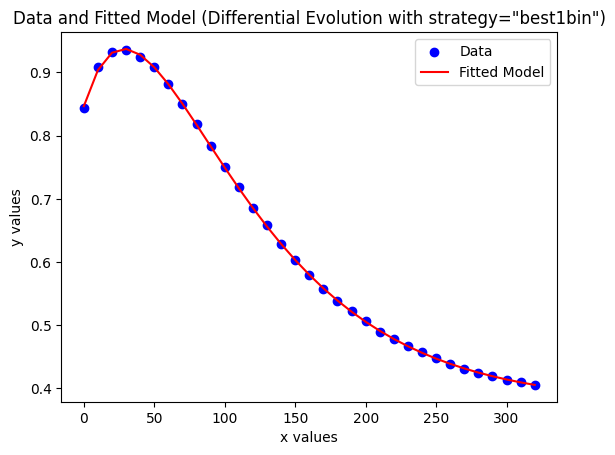

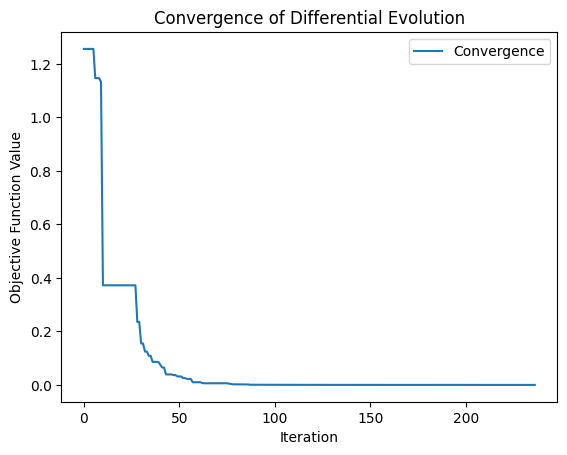

In [43]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Ensure var09_x_values and var09_y_values are numpy arrays
var09_x_values = np.asarray(var09_x_values)
var09_y_values = np.asarray(var09_y_values)

# Define the objective function
def objective_function(params):
    b1, b2, b3, b4, b5 = params
    model = b1 + b2 * np.exp(-var09_x_values * b4) + b3 * np.exp(-var09_x_values * b5)
    residuals = var09_y_values - model
    return np.sum(residuals**2)  # Sum over all data points

# Define bounds for each parameter
bounds = [[0, 10], [0, 5], [-2, 2], [-2, 2], [-2, 2]]

# Initialize a list to store the best function value at each iteration
conv = []

# Define a callback function to capture the best function value at each iteration
def callback(xk, convergence=conv):
    conv.append(objective_function(xk))

# Perform optimization using differential evolution with strategy='best1bin'
result = differential_evolution(objective_function, bounds, strategy='best1bin', callback=callback)

# Print the optimized parameters
print("Optimized parameters:")
print(result.x)

# Calculate the fitted model using the optimized parameters
b1_opt, b2_opt, b3_opt, b4_opt, b5_opt = result.x
fitted_model = b1_opt + b2_opt * np.exp(-var09_x_values * b4_opt) + b3_opt * np.exp(-var09_x_values * b5_opt)

# Plot the original data points
plt.scatter(var09_x_values, var09_y_values, label='Data', color='blue')

# Plot the fitted model using the optimized parameters
plt.plot(var09_x_values, fitted_model, label='Fitted Model', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Data and Fitted Model (Differential Evolution with strategy="best1bin")')
plt.show()

# Plot the convergence plot
plt.plot(conv, label='Convergence')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence of Differential Evolution')
plt.legend()
plt.show()


Optimized parameters:
[-9.12350116e+03  6.00431377e+01  7.56422573e-01]


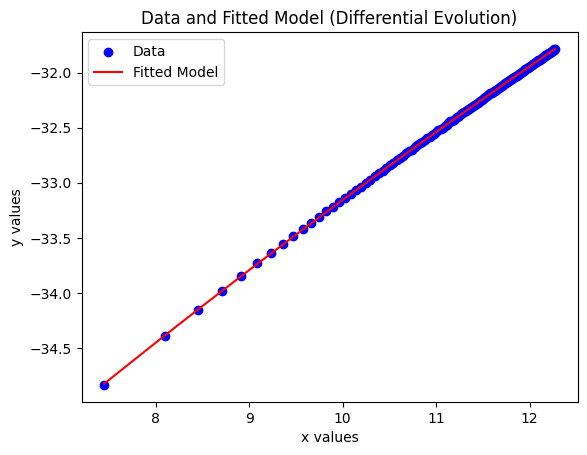

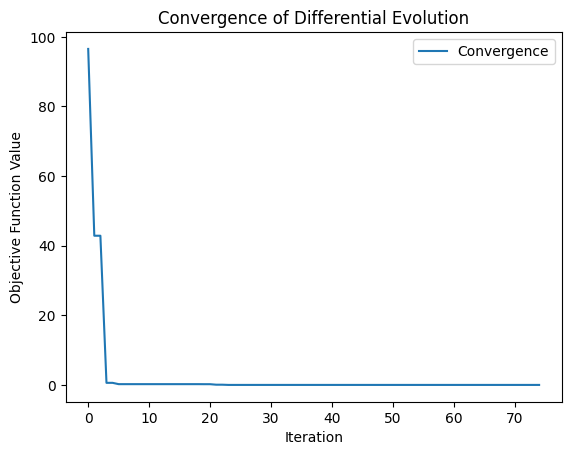

In [60]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Sample data for var18_x_values and var18_y_values
# var18_data = [[2, 1], [4, 3], [6, 5], [8, 7], [10, 9]]
# Ensure var18_x_values and var18_y_values are numpy arrays
var18_x_values = np.array([row[1] for row in var18_data if row[0] is not None][1:])
var18_y_values = np.array([row[0] for row in var18_data if row[0] is not None][1:])

# Define the objective function
def objective_function(params):
    b1, b2, b3 = params
    return np.sum([(var18_y_values[i] - b1 * np.power(b2 + var18_x_values[i], -1/b3))**2 for i in range(len(var18_x_values))])

# Define bounds for each parameter
bounds = np.array([[-10000, -1000], [1, 100], [0, 1]])

# Initialize a list to store the best function value at each iteration
conv = []

# Define a callback function to capture the best function value at each iteration
def callback(xk, convergence=conv):
    conv.append(objective_function(xk))

# Perform optimization using differential evolution
result = differential_evolution(objective_function, bounds, callback=callback)

# Print the optimized parameters
print("Optimized parameters:")
print(result.x)

# Generate the fitted model using the optimized parameters
b1_opt, b2_opt, b3_opt = result.x
fitted_model = b1_opt * np.power(b2_opt + var18_x_values, -1/b3_opt)

# Plot the original data points
plt.scatter(var18_x_values, var18_y_values, label='Data', color='blue')

# Plot the fitted model using the optimized parameters
plt.plot(var18_x_values, fitted_model, label='Fitted Model', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Data and Fitted Model (Differential Evolution)')
plt.show()

# Plot the convergence plot
plt.plot(conv, label='Convergence')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence of Differential Evolution')
plt.legend()
plt.show()
